<a href="https://colab.research.google.com/github/pmouchtar/InstacartAnalysis/blob/main/InstaCartAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ξεκινάμε με εισαγωγή των δεδομένων, καθαρισμό, merge και Data Exploration**

In [9]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [10]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# load method
def load_csv(file_name):
    return kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "psparks/instacart-market-basket-analysis",
        file_name
    )

# to load the data
orders = load_csv("orders.csv")
aisles = load_csv("aisles.csv")
products = load_csv("products.csv")
departments = load_csv("departments.csv")
order_products_prior = load_csv("order_products__prior.csv")
order_products_train = load_csv("order_products__train.csv")

# to check if everything is loaded as expected
print("orders:", orders.shape)
print("aisles:", aisles.shape)
print("products:", products.shape)
print("departments:", departments.shape)
print("order_products_prior:", order_products_prior.shape)
print("order_products_train:", order_products_train.shape)

<ipython-input-10-2861e7493fe7>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  return kagglehub.load_dataset(
<ipython-input-10-2861e7493fe7>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  return kagglehub.load_dataset(
<ipython-input-10-2861e7493fe7>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  return kagglehub.load_dataset(
<ipython-input-10-2861e7493fe7>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  return kagglehub.load_dataset(
<ipython-input-10-2861e7493fe7>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  return kagglehub.load_dataset(
<ipython-input-10-2861e7493fe7>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  return kagglehub.load_dataset(


orders: (3421083, 7)
aisles: (134, 2)
products: (49688, 4)
departments: (21, 2)
order_products_prior: (32434489, 4)
order_products_train: (1384617, 4)


In [11]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [13]:
# 1. Παίρνουμε sample από order_products_prior, γιατί το dataset είναι πολύ μεγάλο για το collab
sampled_op = order_products_prior.sample(500_000, random_state=42)

# 2. Κάνουμε merge σταδιακά
merged = sampled_op.merge(orders, on='order_id', how='left')
merged = merged.merge(products, on='product_id', how='left')
merged = merged.merge(aisles, on='aisle_id', how='left')
merged = merged.merge(departments, on='department_id', how='left')

merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,3109255,34099,16,0,135284,prior,9,0,19,8.0,Crushed Red Chili Pepper,104,13,spices seasonings,pantry
1,301098,41950,5,0,7293,prior,2,4,15,1.0,Organic Tomato Cluster,83,4,fresh vegetables,produce
2,1181866,45066,8,0,111385,prior,2,1,17,8.0,Honeycrisp Apple,24,4,fresh fruits,produce
3,1678630,8859,2,1,147365,prior,7,0,14,26.0,Natural Spring Water,115,7,water seltzer sparkling water,beverages
4,644090,24781,2,0,99290,prior,7,0,19,30.0,"PODS Laundry Detergent, Ocean Mist Designed fo...",75,17,laundry,household


In [14]:
merged.describe()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,467945.000000,500000.000000,500000.000000
mean,1.712130e+06,25565.318266,8.363160,0.589302,102932.557446,17.115786,2.735148,13.434576,11.110252,71.184980,9.926668
std,9.870904e+05,14104.361196,7.145807,0.491961,59455.164781,17.472609,2.089889,4.249730,8.776726,38.196697,6.278136
min,1.800000e+01,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8.581280e+05,13517.000000,3.000000,0.000000,51496.500000,5.000000,1.000000,10.000000,5.000000,31.000000,4.000000
50%,1.713476e+06,25197.000000,6.000000,1.000000,102520.500000,11.000000,3.000000,13.000000,8.000000,83.000000,9.000000
75%,2.565028e+06,37919.000000,11.000000,1.000000,154482.000000,24.000000,5.000000,16.000000,15.000000,107.000000,16.000000
max,3.421081e+06,49688.000000,136.000000,1.000000,206209.000000,99.000000,6.000000,23.000000,30.000000,134.000000,21.000000


In [15]:
# Days of the week in letters instead of numbers for readability
dow_map = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

merged['order_dow_name'] = merged['order_dow'].map(dow_map)

<ipython-input-16-b4ae3d55bcad>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_per_day.index, y=orders_per_day.values, palette='viridis')


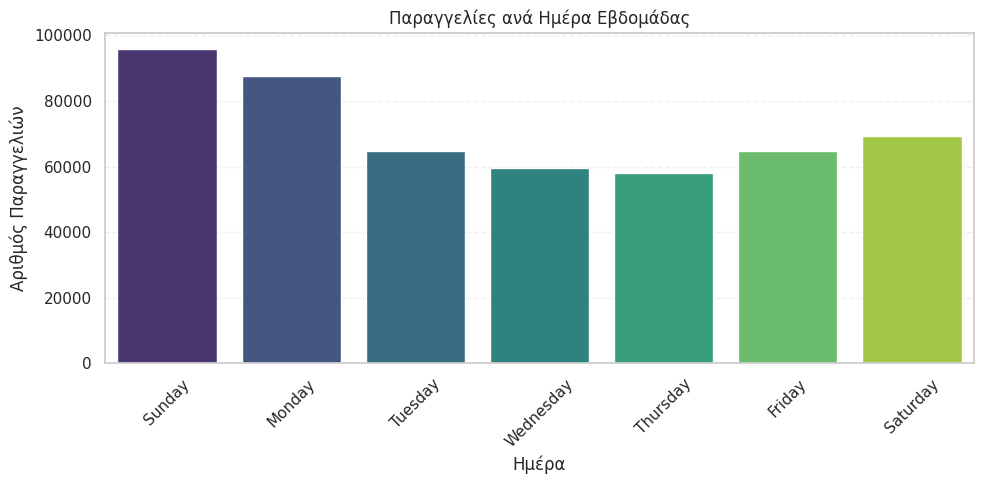

In [16]:
# Κάνουμε groupby για να μετρήσουμε πόσες παραγγελίες έγιναν ανά ημέρα
orders_per_day = merged.groupby('order_dow_name').size().reindex([
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=orders_per_day.index, y=orders_per_day.values, palette='viridis')
plt.title('Παραγγελίες ανά Ημέρα Εβδομάδας')
plt.ylabel('Αριθμός Παραγγελιών')
plt.xlabel('Ημέρα')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Κυριακή και Δευτέρα ο μεγαλύτερος αριθμός πωλήσεων με διαφορά. Συνήθεια των πελατών: οι πελάτες κάνουν restock για την εβδομάδα.

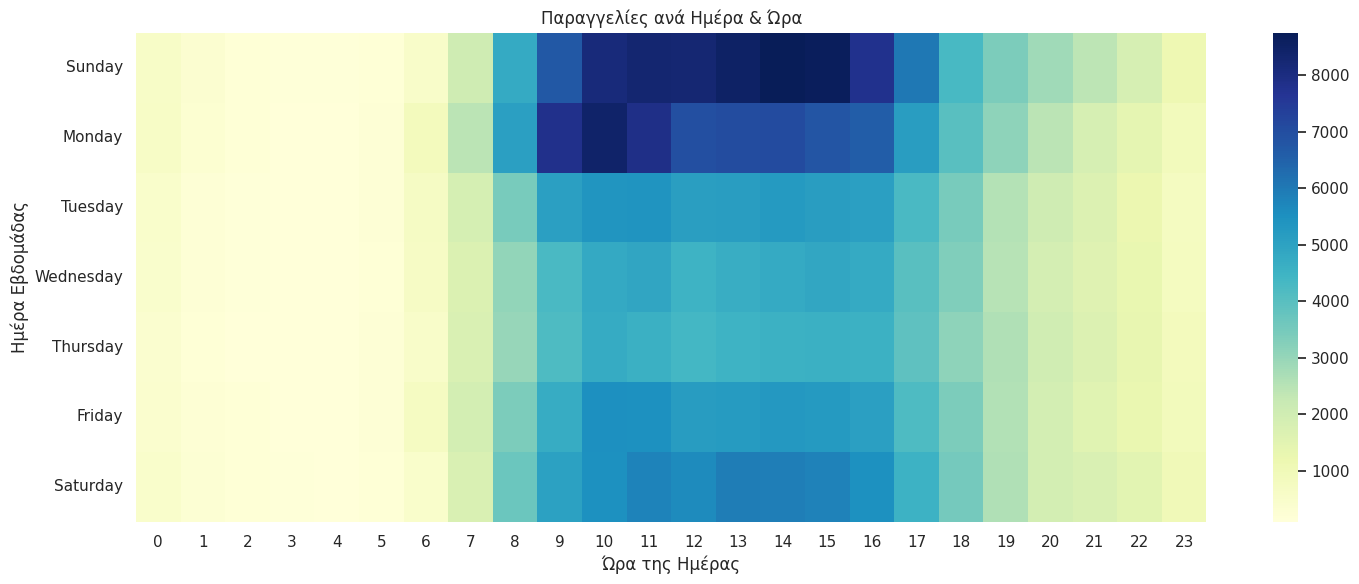

In [17]:
# Δημιουργούμε pivot table: day * hour = πόσες παραγγελίες
pivot = merged.pivot_table(
    index='order_dow_name',
    columns='order_hour_of_day',
    values='order_id',
    aggfunc='count'
)

# Για να εμφανίζεται η σειρά ημερών σωστά
pivot = pivot.reindex([
    'Sunday', 'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday'
])


plt.figure(figsize=(15, 6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Παραγγελίες ανά Ημέρα & Ώρα')
plt.xlabel('Ώρα της Ημέρας')
plt.ylabel('Ημέρα Εβδομάδας')
plt.tight_layout()
plt.show()

Ώρες αιχμής από 9 το πρωί μέχρι 16:00. Ώρες με μειωμένες παραγγελίες 7-9 το πρωί και 17:00-21:00. Νεκρές σχεδόν ώρες 23:00 με 6:00. Λογικό!

<ipython-input-18-6192bde0f49f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_departments.values, y=top_departments.index, palette='magma')


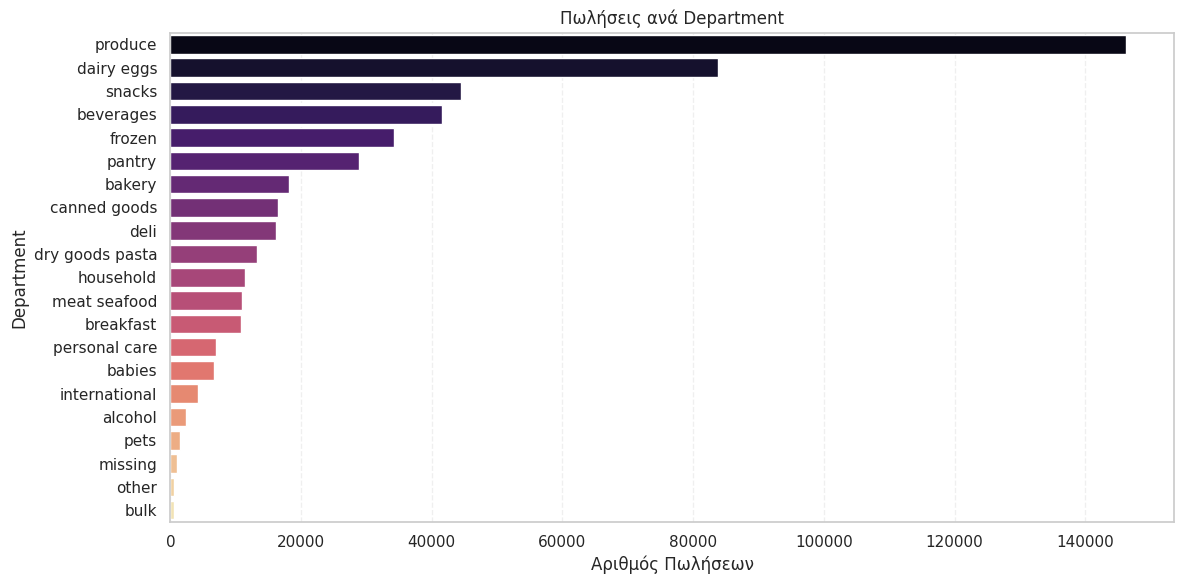

In [18]:
# Group by department για να δούμε ποιο department πουλάει περισσότερο
top_departments = merged.groupby('department')['product_id'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_departments.values, y=top_departments.index, palette='magma')
plt.title('Πωλήσεις ανά Department')
plt.xlabel('Αριθμός Πωλήσεων')
plt.ylabel('Department')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Top department με διαφορά το produce, δηλαδή φρούτα και λαχανικά. Επίσης πολύ υψηλά τα γαλακτοκομικά και τα αυγά. Ακολουθούν snacks, beverages και κατεψυγμένα. Αυτές είναι δηλαδή και οι ομάδες προιόντων που δημιουργούν ένα μεγάλο μέρος του revenue, με αυτά πρέπει να ασχοληθούμε.

<ipython-input-19-778f9974aefe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_aisles.values, y=top_aisles.index, palette='crest')


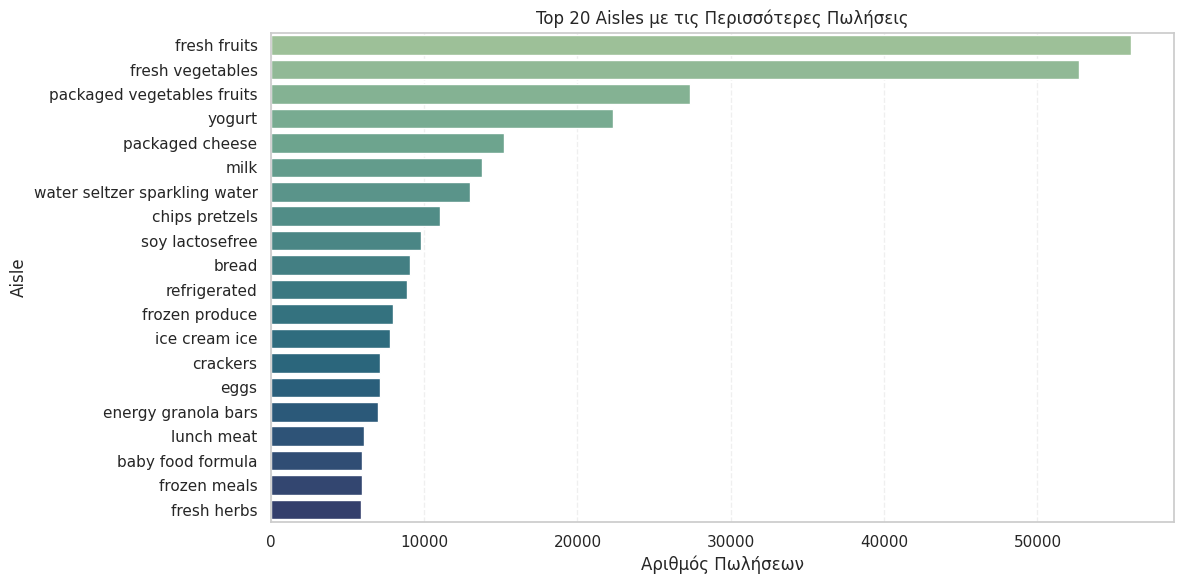

In [19]:
# Group by aisle για να δούμε ποιο aisle έχει την περισσότερη κίνηση
top_aisles = merged.groupby('aisle')['product_id'].count().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_aisles.values, y=top_aisles.index, palette='crest')
plt.title('Top 20 Aisles με τις Περισσότερες Πωλήσεις')
plt.xlabel('Αριθμός Πωλήσεων')
plt.ylabel('Aisle')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Ίδια συμπεράσματα και με τους διαδρόμους

<ipython-input-20-a1c082eb84e4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


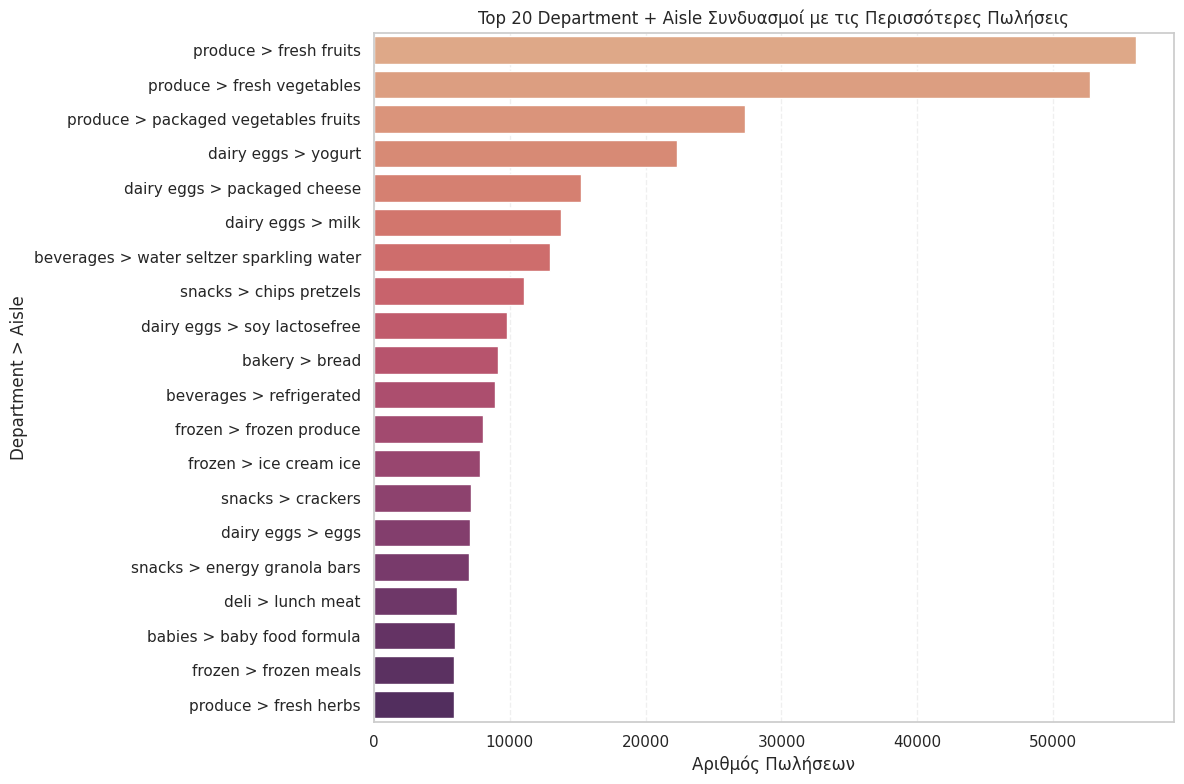

In [20]:
# Group by department + aisle και μετράμε τις πωλήσεις
dept_aisle_sales = merged.groupby(['department', 'aisle'])['product_id'].count().sort_values(ascending=False).head(20)

# Μετατρέπουμε σε DataFrame για plotting
dept_aisle_sales = dept_aisle_sales.reset_index(name='sales')

# Φτιάχνουμε μια ενιαία ετικέτα για τον άξονα y (π.χ. dairy > yogurt)
dept_aisle_sales['label'] = dept_aisle_sales['department'] + ' > ' + dept_aisle_sales['aisle']

plt.figure(figsize=(12, 8))
sns.barplot(
    data=dept_aisle_sales,
    x='sales',
    y='label',
    palette='flare'
)
plt.title('Top 20 Department + Aisle Συνδυασμοί με τις Περισσότερες Πωλήσεις')
plt.xlabel('Αριθμός Πωλήσεων')
plt.ylabel('Department > Aisle')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

<ipython-input-21-7abfdbb80727>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


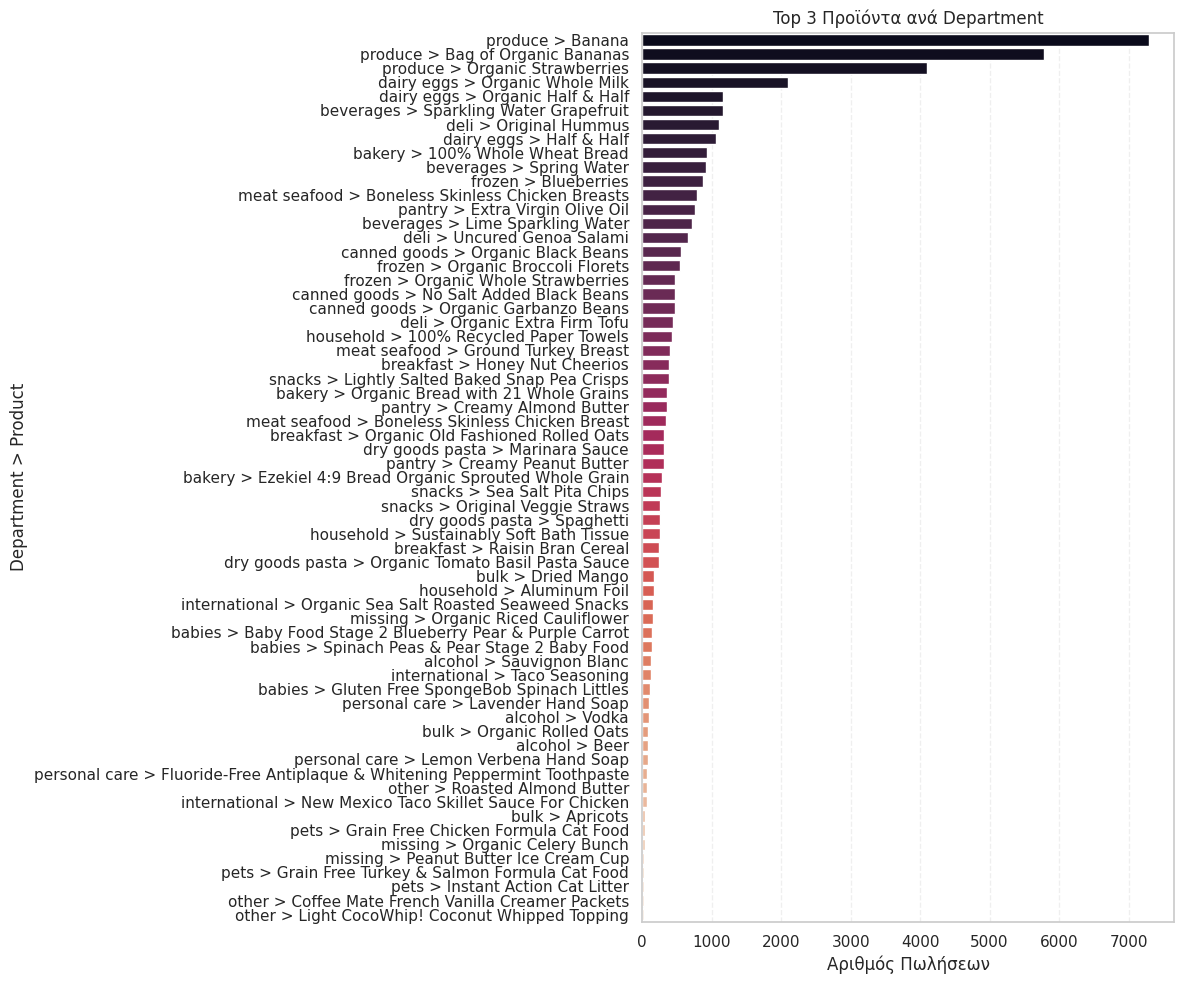

In [21]:
# Group by department + product και μετράμε πόσες φορές πουλήθηκε κάθε προϊόν
prod_sales = (
    merged.groupby(['department', 'product_name'])['product_id']
    .count()
    .reset_index(name='sales')
)

# Βρίσκουμε τα top 3 προϊόντα για κάθε department
top_products_per_dept = (
    prod_sales.sort_values(['department', 'sales'], ascending=[True, False])
    .groupby('department')
    .head(3)
)

# Δημιουργούμε ετικέτες για το plot
top_products_per_dept['label'] = top_products_per_dept['department'] + ' > ' + top_products_per_dept['product_name']


plt.figure(figsize=(12, 10))
sns.barplot(
    data=top_products_per_dept.sort_values('sales', ascending=False),
    x='sales',
    y='label',
    palette='rocket'
)
plt.title('Top 3 Προϊόντα ανά Department')
plt.xlabel('Αριθμός Πωλήσεων')
plt.ylabel('Department > Product')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


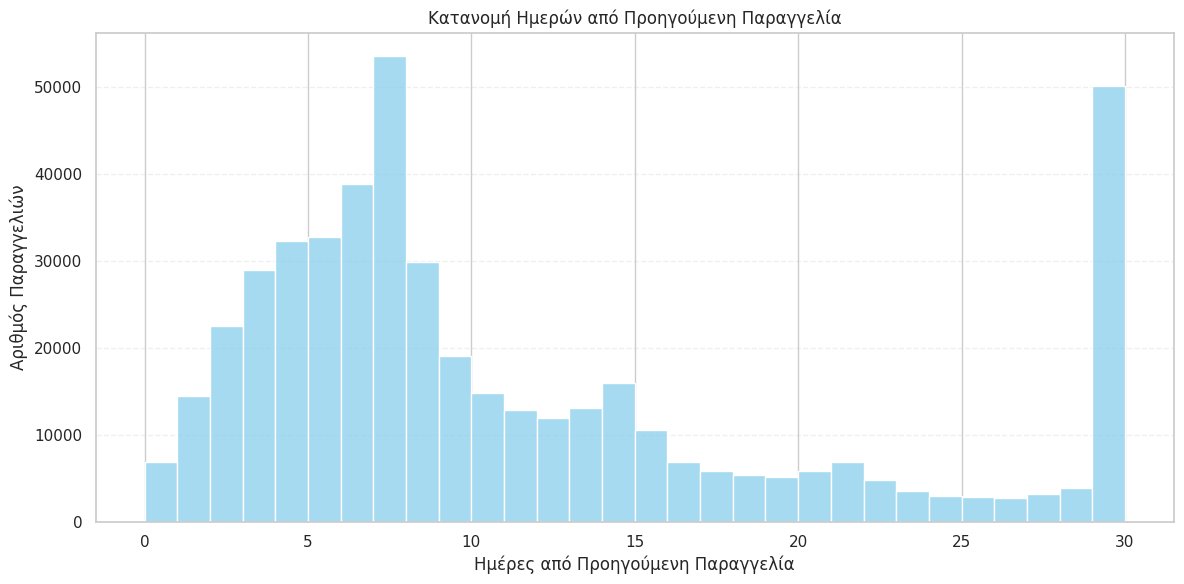

In [22]:
# Γράφημα για μέρες από προηγούμενη παραγγελία
# Drop nulls γιατί η πρώτη παραγγελία κάθε χρήστη δεν έχει prior
filtered = merged[~merged['days_since_prior_order'].isnull()]

plt.figure(figsize=(12, 6))
sns.histplot(
    filtered['days_since_prior_order'],
    bins=30,
    kde=False,
    color='skyblue'
)
plt.title('Κατανομή Ημερών από Προηγούμενη Παραγγελία')
plt.xlabel('Ημέρες από Προηγούμενη Παραγγελία')
plt.ylabel('Αριθμός Παραγγελιών')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Peak στο 7 και στο 30, που δείχνει συνήθεια σε εβδομαδιαία βάση.
 Το peak στο 30 ίσως υπάρχει επειδή μετριούνται και οι επαναλήψεις >30 ημερών. Επίσης υπάρχει μεγάλη επανάληψη παραγγελιών μέσα στην πρώτη εβδομάδα, ίσως για προιόντα μικρής διάρκειας, πχ γάλα.

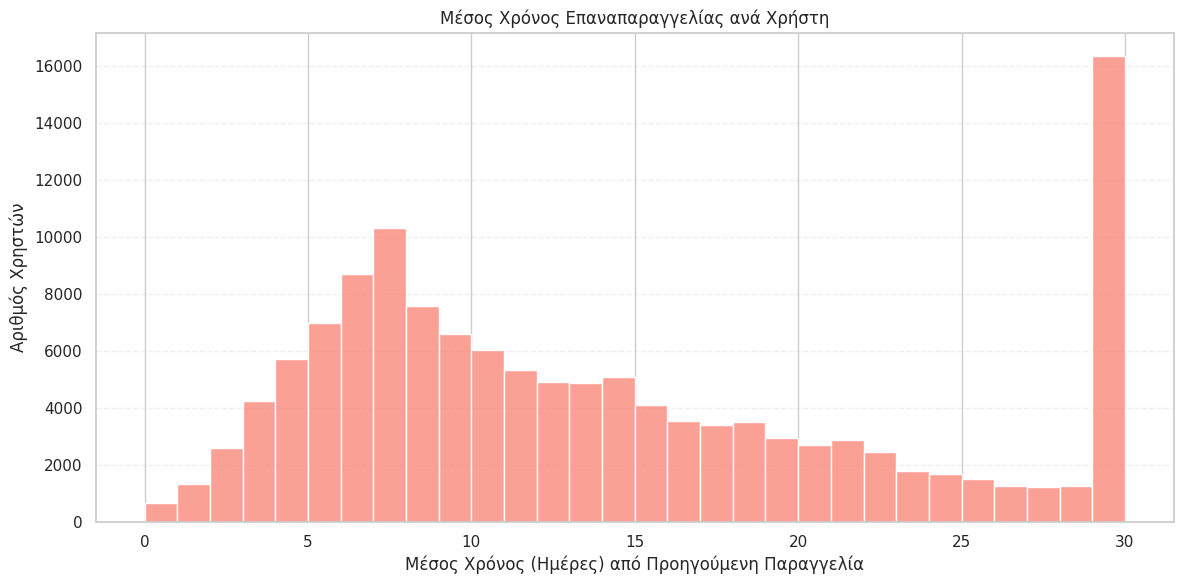

In [23]:
# Ομαδοποιούμε ανά χρήστη και υπολογίζουμε το μέσο όρο των ημερών από την προηγούμενη παραγγελία
avg_days_per_user = merged.groupby('user_id')['days_since_prior_order'].mean()

# Πλοτ του μέσου όρου επαναπαραγγελίας ανά χρήστη
plt.figure(figsize=(12, 6))
sns.histplot(
    avg_days_per_user,
    bins=30,
    kde=False,
    color='salmon'
)
plt.title('Μέσος Χρόνος Επαναπαραγγελίας ανά Χρήστη')
plt.xlabel('Μέσος Χρόνος (Ημέρες) από Προηγούμενη Παραγγελία')
plt.ylabel('Αριθμός Χρηστών')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Οι περισσότεροι χρήστες έχουν μέσο χρόνο αναπαραγγελίας 7 ημέρες, αλλά και κοντά στο 7. Πάνω-κάτω αυτό που είδαμε και πιο πάνω. 30 μέρες απότι φαίνεται μετριούνται και οι >30 ημερών, γιαυτό και υπάρχει συσπείρωση.

<ipython-input-24-abf67eb19b94>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=department_repeat_sales.values, y=department_repeat_sales.index, palette='Blues_d')


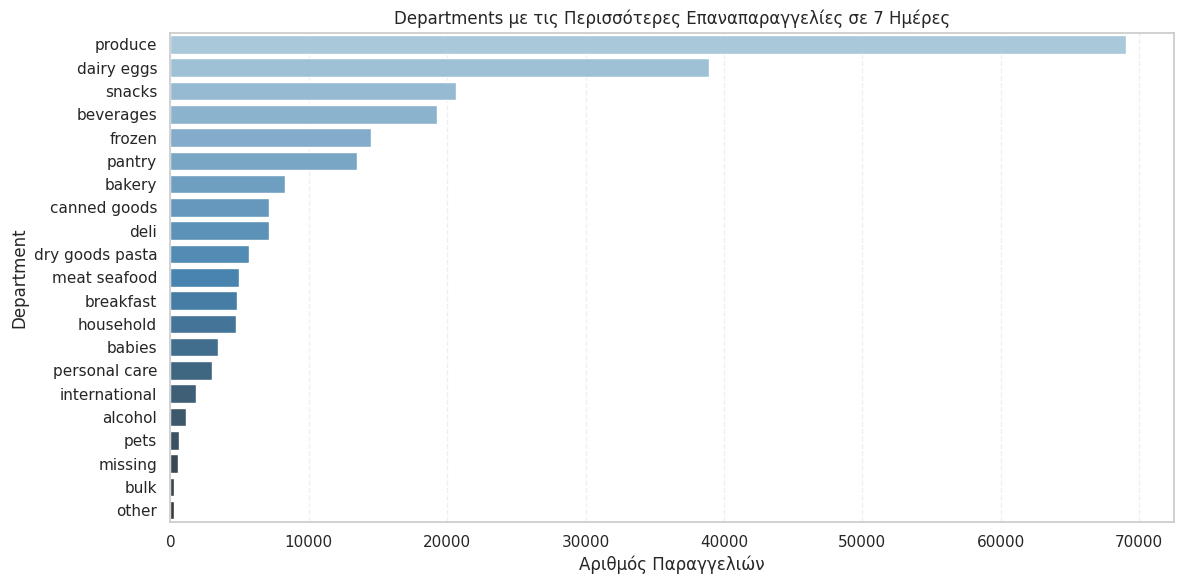

In [24]:
# Department με περισσότερες επαναπαραγγελίες
# Φιλτράρουμε τα δεδομένα για μικρές διάρκειες επαναπαραγγελίας 1-7 μέρες
short_repeat_orders = merged[merged['days_since_prior_order'] <= 7]

# Group by department και μετράμε πόσες παραγγελίες έγιναν σε αυτό το διάστημα
department_repeat_sales = short_repeat_orders.groupby('department')['product_id'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=department_repeat_sales.values, y=department_repeat_sales.index, palette='Blues_d')
plt.title('Departments με τις Περισσότερες Επαναπαραγγελίες σε 7 Ημέρες')
plt.xlabel('Αριθμός Παραγγελιών')
plt.ylabel('Department')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**Ακολουθεί το Predictive Modeling με Machine Learning**

Θα διαλέξουμε το reordered ως target variable: Θα ξαναπαραγείλει ο χρήστης ένα συγκεκριμένο προιόν;

Αρχικά μόνο με κάποια βασικά πεδία και κάνοντας drop τα υπόλοιπα

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Κρατάμε μόνο μερικά columns
X = merged.drop(columns=['order_dow_name', 'reordered', 'order_id', 'product_id', 'user_id', 'product_name', 'eval_set', 'aisle', 'department'])
y = merged['reordered']

# Χωρίζουμε τα δεδομένα σε train και test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Χρησιμοποιούμε 'mean' για την αντικατάσταση
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Εκπαίδευση Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Εκπαίδευση Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

# Αξιολόγηση μοντέλων
# Predictions για Random Forest
rf_pred = rf.predict(X_test_scaled)

# Predictions για Logistic Regression
lr_pred = lr.predict(X_test_scaled)

# Metrics Evaluation
# Random Forest Evaluation
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Logistic Regression Evaluation
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

# Αποτελέσματα
print(f"Random Forest - Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1: {rf_f1:.4f}")
print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1: {lr_f1:.4f}")


Random Forest - Accuracy: 0.7157, Precision: 0.7285, Recall: 0.8224, F1: 0.7726
Logistic Regression - Accuracy: 0.7003, Precision: 0.7202, Recall: 0.8007, F1: 0.7583


Έπειτα προσθέτουμε product frequency και user frequency

In [ ]:
# Συσχέτιση προϊόντων με την συχνότητα επαναγοράς
product_freq = merged.groupby('product_id')['reordered'].sum()

# Συσχέτιση χρηστών με την συχνότητα επαναγοράς
user_freq = merged.groupby('user_id')['reordered'].sum()

# Προσθήκη των χαρακτηριστικών συχνότητας στον κύριο πίνακα
merged['product_reorder_freq'] = merged['product_id'].map(product_freq)
merged['user_reorder_freq'] = merged['user_id'].map(user_freq)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Κρατάμε μόνο κάποια fields
X = merged.drop(columns=['order_dow_name', 'reordered', 'order_id', 'product_id', 'user_id', 'product_name', 'eval_set', 'aisle', 'department'])
y = merged['reordered']

# Χωρίζουμε τα δεδομένα σε train και test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Χρησιμοποιούμε 'mean' για την αντικατάσταση
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Εκπαίδευση Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Εκπαίδευση Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

# Αξιολόγηση μοντέλων]
# Predictions για Random Forest
rf_pred = rf.predict(X_test_scaled)

# Predictions για Logistic Regression
lr_pred = lr.predict(X_test_scaled)

# Metrics Evaluation
# Random Forest Evaluation
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Logistic Regression Evaluation
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

# Αποτελέσματα
print(f"Random Forest - Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1: {rf_f1:.4f}")
print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1: {lr_f1:.4f}")

Random Forest - Accuracy: 0.7947, Precision: 0.7789, Recall: 0.9081, F1: 0.8385
Logistic Regression - Accuracy: 0.7256, Precision: 0.7582, Recall: 0.7820, F1: 0.7699


Στη συνέχεια προσθέτουμε ακόμα περισσότερα χαρακτηριστικά

In [ ]:
# Δημιουργία Νέων Χαρακτηριστικών
# Συχνότητα Επαναγοράς Προϊόντων και Χρηστών
product_freq = merged.groupby('product_id')['reordered'].sum()
user_freq = merged.groupby('user_id')['reordered'].sum()
merged['product_reorder_freq'] = merged['product_id'].map(product_freq)
merged['user_reorder_freq'] = merged['user_id'].map(user_freq)

# Διαφορά στις Παραγγελίες (Days Since Prior Order)
merged['days_since_prior_order_diff'] = merged.groupby('user_id')['days_since_prior_order'].diff().fillna(0)

# Αριθμός προϊόντων στο καλάθι
product_count = merged.groupby('order_id')['product_id'].count()
merged['num_products_in_cart'] = merged['order_id'].map(product_count)

# Αλληλεπίδραση ημέρας της εβδομάδας και ώρας παραγγελίας
merged['order_dow_hour_interaction'] = merged['order_dow'] * merged['order_hour_of_day']

# Κρατάμε μόνο κάποια fields
X = merged.drop(columns=['order_dow_name', 'reordered', 'order_id', 'product_id', 'user_id', 'product_name', 'eval_set', 'aisle', 'department','department_encoded', 'aisle_encoded'])
y = merged['reordered']

# Χωρίζουμε τα δεδομένα σε train και test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Εκπαίδευση και Αξιολόγηση Μοντέλων
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

rf_pred = rf.predict(X_test_scaled)
lr_pred = lr.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

# Εκτύπωση Αποτελεσμάτων
print(f"Random Forest - Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1: {rf_f1:.4f}")
print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1: {lr_f1:.4f}")


Random Forest - Accuracy: 0.8030, Precision: 0.7833, Recall: 0.9184, F1: 0.8455
Logistic Regression - Accuracy: 0.7266, Precision: 0.7583, Recall: 0.7843, F1: 0.7711


Τέλος προσθέτουμε και department και aisle

In [ ]:
# Δημιουργία Νέων Χαρακτηριστικών
# Συχνότητα Επαναγοράς Προϊόντων και Χρηστών
product_freq = merged.groupby('product_id')['reordered'].sum()
user_freq = merged.groupby('user_id')['reordered'].sum()
merged['product_reorder_freq'] = merged['product_id'].map(product_freq)
merged['user_reorder_freq'] = merged['user_id'].map(user_freq)

# Διαφορά στις Παραγγελίες (Days Since Prior Order)
merged['days_since_prior_order_diff'] = merged.groupby('user_id')['days_since_prior_order'].diff().fillna(0)

# Encoding κατηγορίας προϊόντος
merged['department_encoded'] = merged['department_id'].map(departments.set_index('department_id')['department'])
merged['aisle_encoded'] = merged['aisle_id'].map(aisles.set_index('aisle_id')['aisle'])
merged = pd.get_dummies(merged, columns=['department_encoded', 'aisle_encoded'], drop_first=True)

# Αριθμός προϊόντων στο καλάθι
product_count = merged.groupby('order_id')['product_id'].count()
merged['num_products_in_cart'] = merged['order_id'].map(product_count)

# Αλληλεπίδραση ημέρας της εβδομάδας και ώρας παραγγελίας
merged['order_dow_hour_interaction'] = merged['order_dow'] * merged['order_hour_of_day']

# Train/Test Split
X = merged.drop(columns=['order_dow_name', 'reordered', 'order_id', 'product_id', 'user_id', 'product_name', 'eval_set', 'aisle', 'department'])
y = merged['reordered']

# Χωρίζουμε τα δεδομένα σε train και test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Εκπαίδευση και Αξιολόγηση Μοντέλων
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

rf_pred = rf.predict(X_test_scaled)
lr_pred = lr.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

# Εκτύπωση Αποτελεσμάτων
print(f"Random Forest - Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1: {rf_f1:.4f}")
print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1: {lr_f1:.4f}")

Random Forest - Accuracy: 0.7994, Precision: 0.7804, Recall: 0.9161, F1: 0.8428
Logistic Regression - Accuracy: 0.7342, Precision: 0.7582, Recall: 0.8036, F1: 0.7803


Πλεονεκτήματα Random Forest:

---


Πολύ ισχυρό Recall: μεγαλύτερη ακρίβεια, ιδανικό για σύστημα που θέλει να προβλέψει τι θα ξαναγοραστεί.

Αναβαθμίζεται ξεκάθαρα με παραπάνω features: σημαντική άνοδος σε όλους τους δείκτες, ιδίως με τα frequency-based features και interaction terms.

Ανθεκτικός σε μη-γραμμικές σχέσεις, δεν χρειάζεται scaling, δουλεύει με μεγάλες ποσότητες χαρακτηριστικών.

 Μειονεκτήματα:

---


Πιο αργός σε εκπαίδευση/πρόβλεψη, και δύσκολος στο να εξηγηθεί (black box).

Κίνδυνος overfitting, αν και εδώ δεν φαίνεται να συμβαίνει σοβαρά.


---
 Πλεονεκτήματα Logistic Regression:

---


Απλό, γρήγορο και ερμηνεύσιμο μοντέλο — καλό για baseline.

Αντέδρασε καλά σε παραπάνω χαρακτηριστικά, αλλά χωρίς μεγάλες βελτιώσεις.

 Μειονεκτήματα:

---


Χαμηλότερο Recall => χάνει πολλά reorders (σημαντικό πρόβλημα για recommender σύστημα).

Λιγότερο αποτελεσματικό σε μη-γραμμικές σχέσεις, ακόμα και με engineered features.

---
Τελική Επιλογή: Random Forest


Εξαιρετικά καλύτερη F1 score και Recall (πιο κρίσιμο για προβλέψεις reorders).

Ανταποκρίνεται καλύτερα στην προσθήκη νέων χαρακτηριστικών.

Είναι πιο κατάλληλο για προβλήματα αυτού του τύπου, όπου υπάρχει πολυπλοκότητα, συσχετίσεις, και μεγάλες ποσότητες δεδομένων.



**Ακολουθεί το Customer Segmentation**

<ipython-input-26-4b0d716df60f>:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


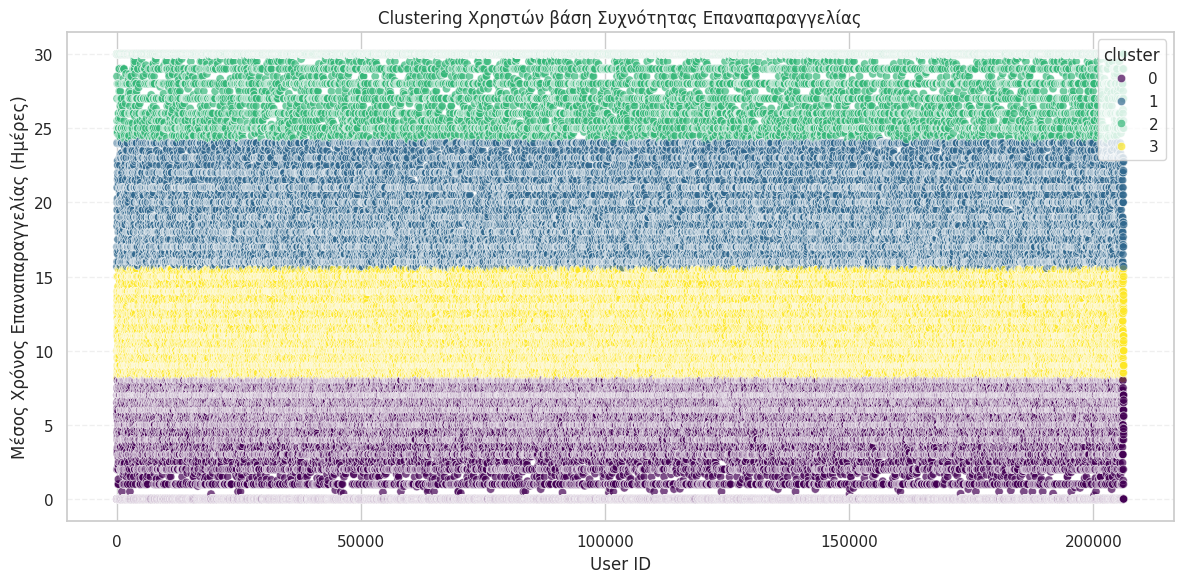

In [26]:
from sklearn.cluster import KMeans

# Κάνουμε το groupby για να υπολογίσουμε τον μέσο χρόνο επαναπαραγγελίας ανά χρήστη
avg_days_per_user = merged.groupby('user_id')['days_since_prior_order'].mean().reset_index()

# Χειριζόμαστε τα nulls
avg_days_per_user['days_since_prior_order'] = avg_days_per_user['days_since_prior_order'].fillna(0)

# Επιλέγουμε τον αριθμό των clusters που θέλουμε
kmeans = KMeans(n_clusters=4, random_state=42)

# Εκπαίδευση του μοντέλου KMeans για να ομαδοποιήσει τους χρήστες
avg_days_per_user['cluster'] = kmeans.fit_predict(avg_days_per_user[['days_since_prior_order']])

# Πλοτ για να δούμε πώς διασπείρονται οι χρήστες στα clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=avg_days_per_user,
    x='user_id',
    y='days_since_prior_order',
    hue='cluster',
    palette='viridis',
    marker='o',
    alpha=0.7
)
plt.title('Clustering Χρηστών βάση Συχνότητας Επαναπαραγγελίας')
plt.xlabel('User ID')
plt.ylabel('Μέσος Χρόνος Επαναπαραγγελίας (Ημέρες)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

* 4 clusters,

*   cluster 0 --> 1-7 μέρες
*   cluster 1 --> 9-15 μέρες
*   cluster 2 --> 16-25 μέρες
*   cluster 3 --> >25 μέρες

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Χρησιμοποιούμε το feature που κάναμε clustering: avg_days_since_prior_order
X = avg_days_per_user[['days_since_prior_order']]

# Silhouette Score
silhouette_avg = silhouette_score(X, avg_days_per_user['cluster'])
print(f"Silhouette Score for KMeans: {silhouette_avg:.4f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X, avg_days_per_user['cluster'])
print(f"Davies-Bouldin Index for KMeans: {db_index:.4f}")

Silhouette Score for KMeans: 0.5734
Davies-Bouldin Index for KMeans: 0.5094


* Silhouette score > 0.5 γενικά θεωρείται καλό. (καθαρός διαχωρισμός)
* db index< 1 θεωρείται πολύ καλό. (λιγότερη επικάλυψη μεταξύ clusters)


**Result Interpretation and Business Strategies**
1.   cluster = 0
* Χαμηλή Μέση Ημέρα Επαναγοράς  (1-7 μέρες)
* Πολύ ενεργοί χρήστες
* Loyalty campaigns, points system
2.   cluster = 1
* Μέτρια Μέση Ημέρα Επαναγοράς  (8-15 μέρες)
* Συστηματικοί, αλλά όχι καθημερινοί
* Personalized offers, bundles
3.   cluster = 2
* Υψηλή Μέση Ημέρα Επαναγοράς   (16-25 μέρες)
* Αραιοί αγοραστές
* Reminder emails
4.   cluster = 3
* Πολύ υψηλή Μέση Ημέρα Επαναγοράς (>25 μέρες)
* Σχεδόν ανενεργοί χρήστες
* Reactivation campaigns, special promotions



In [29]:
# Ενώνουμε τα δεδομένα με τα προϊόντα και τα clusters
user_products = merged[['user_id', 'product_name', 'days_since_prior_order']]
user_products = user_products.merge(avg_days_per_user[['user_id', 'cluster']], on='user_id', how='left')

# Συνολική ποσότητα προϊόντων ανά cluster
top_products_per_cluster = user_products.groupby(['cluster', 'product_name']).size().reset_index(name='count')

# Κάνουμε το pivot για να δείξουμε τα προϊόντα ανά cluster
pivot_top_products = top_products_per_cluster.pivot_table(index='product_name', columns='cluster', values='count', aggfunc='sum', fill_value=0)

# Επιλέγουμε τα πιο δημοφιλή προϊόντα σε κάθε cluster (π.χ. top 10 προϊόντα ανά cluster)
top_10_products_per_cluster = pivot_top_products.apply(lambda x: x.sort_values(ascending=False).head(10), axis=0)

top_10_products_per_cluster


cluster,0,1,2,3
product_name,,,,
Bag of Organic Bananas,2921.0,701.0,336.0,1824.0
Banana,3226.0,1024.0,505.0,2535.0
Cucumber Kirby,NaN,263.0,147.0,NaN
Large Lemon,971.0,356.0,190.0,845.0
Limes,NaN,336.0,170.0,745.0
Organic Avocado,1147.0,435.0,218.0,976.0
Organic Baby Spinach,1652.0,533.0,285.0,1283.0
Organic Hass Avocado,1609.0,410.0,170.0,1042.0
Organic Raspberries,1092.0,NaN,NaN,694.0


<ipython-input-21-fa27ca64b706>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='Blues_d')
<ipython-input-21-fa27ca64b706>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='Blues_d')
<ipython-input-21-fa27ca64b706>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='Blues_d')
<ipython-input-21-fa27ca64b706>:8: FutureWarning: 

Passing `palette` without assigning `hue` 

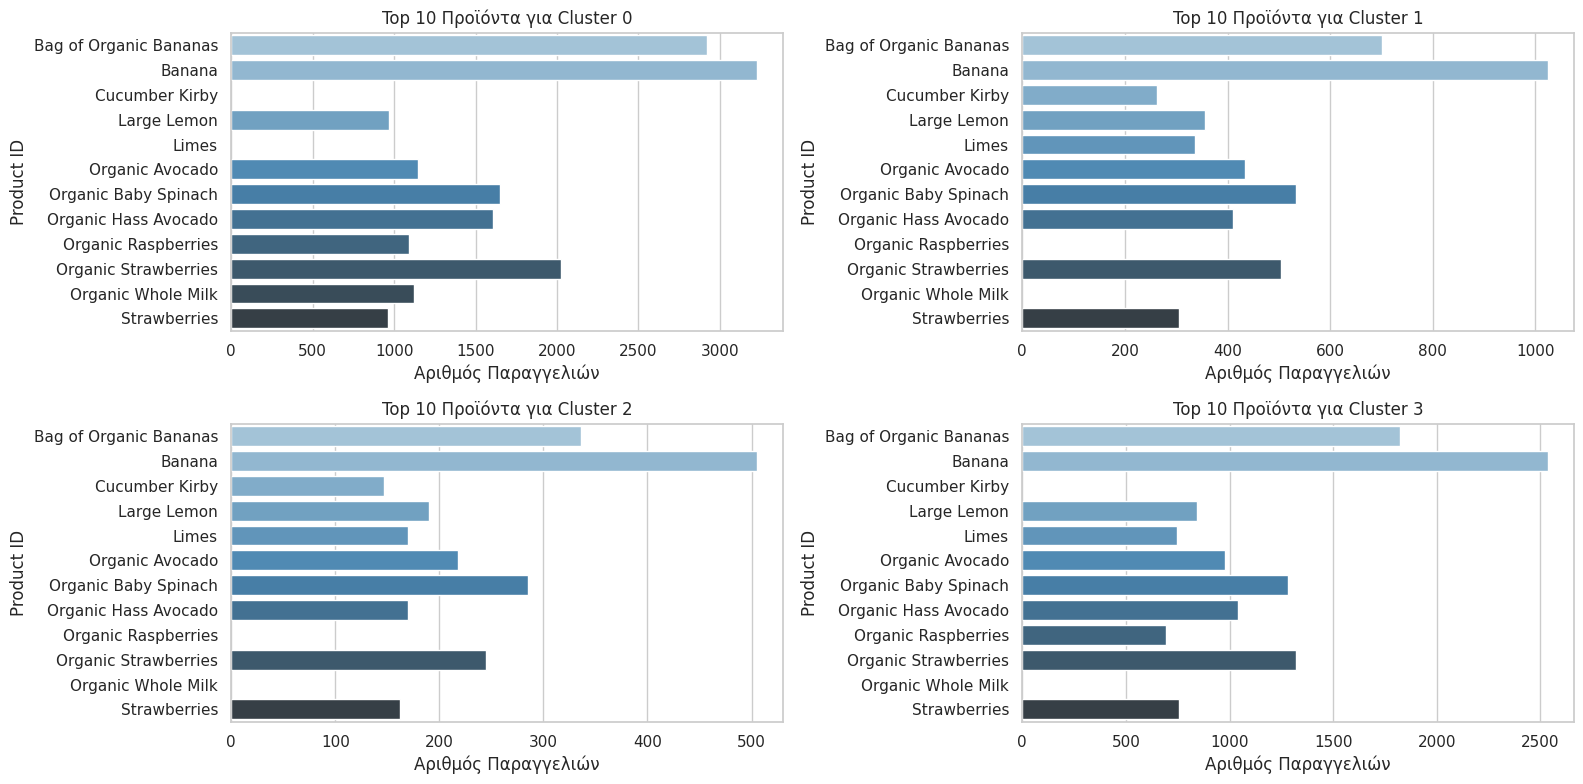

In [ ]:
# Πλοτ των 10 πιο δημοφιλών προϊόντων για κάθε cluster
plt.figure(figsize=(16, 8))

# Για κάθε cluster, φτιάχνουμε το γράφημα
for cluster in range(4):  # 0, 1, 2, 3
    plt.subplot(2, 2, cluster+1)
    top_10_products = top_10_products_per_cluster[cluster]
    sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='Blues_d')
    plt.title(f'Top 10 Προϊόντα για Cluster {cluster}')
    plt.xlabel('Αριθμός Παραγγελιών')
    plt.ylabel('Product ID')

plt.tight_layout()
plt.show()


Dendrogram

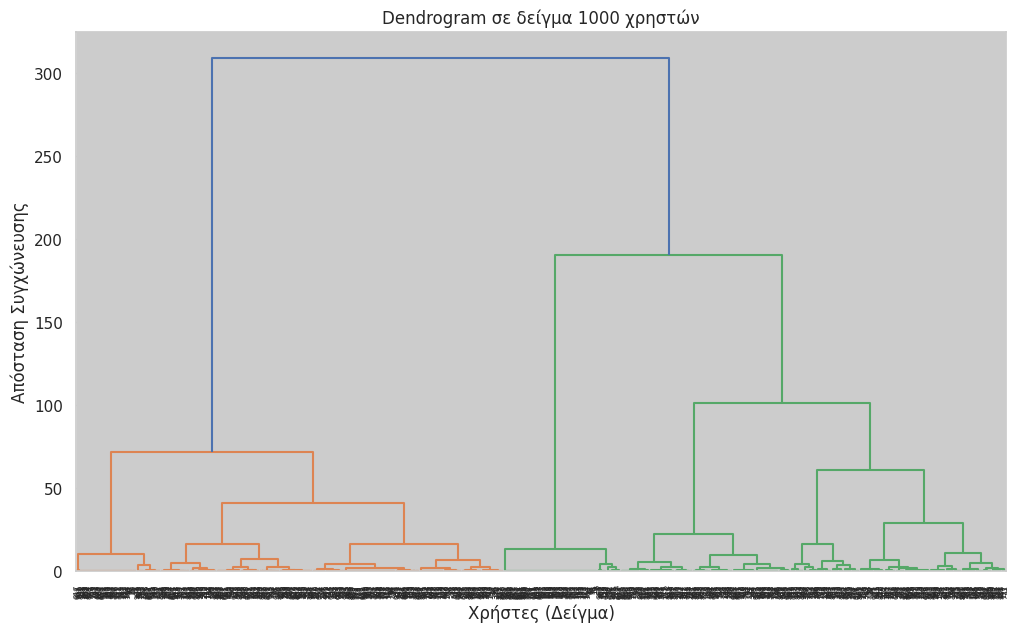

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Παίρνουμε 1000 χρήστες και κρατάμε λίγα features
X_small = avg_days_per_user[['days_since_prior_order']].sample(1000, random_state=42)

# Dendrogram
plt.figure(figsize=(12, 7))
dendrogram = sch.dendrogram(sch.linkage(X_small, method='ward'))
plt.title('Dendrogram σε δείγμα 1000 χρηστών')
plt.xlabel('Χρήστες (Δείγμα)')
plt.ylabel('Απόσταση Συγχώνευσης')
plt.show()


In [ ]:
# Εφαρμογή Agglomerative Clustering σε ΟΛΟ το dataset
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
X_small['hierarchical_cluster'] = hierarchical_cluster.fit_predict(X_small)


In [ ]:
# Αξιολόγηση του clustering
silhouette_avg = silhouette_score(X_small.drop('hierarchical_cluster', axis=1), X_small['hierarchical_cluster'])
db_index = davies_bouldin_score(X_small.drop('hierarchical_cluster', axis=1), X_small['hierarchical_cluster'])

print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

Silhouette Score: 0.5048
Davies-Bouldin Index: 0.4995


In [ ]:
# Μέσοι όροι ανά Cluster
cluster_summary = X_small.groupby('hierarchical_cluster').mean()
print(cluster_summary)

                      days_since_prior_order
hierarchical_cluster                        
0                                   5.232368
1                                  19.042226
2                                  29.593915
3                                  11.948492


Αναλύσαμε τη συχνότητα των αγορών των χρηστών χρησιμοποιώντας Hierarchical Clustering με το χαρακτηριστικό days_since_prior_order και διαχωρίσαμε τους χρήστες σε 4 ομάδες. Οι ομάδες περιλαμβάνουν χρήστες που παραγγέλνουν πολύ συχνά, συχνά, περιστασιακά και σπάνια. Οι στρατηγικές marketing περιλαμβάνουν VIP προγράμματα και loyalty rewards για τους πιο συχνούς χρήστες, εξατομικευμένες προσφορές για τους συχνούς, κουπόνια για τους περιστασιακούς, και προσφορές επαναδραστηριοποίησης για τους σπάνιους. Οι στρατηγικές αυτές στοχεύουν στην αύξηση της συχνότητας των παραγγελιών και στην βελτίωση του customer retention.

Πιο κάτω κάνουμε ένα exploration των διαφορετικών clusters απο Customers.
Χρησιμοποιούμε PCA και t-SNE.

In [ ]:
# Υπολογίζουμε κάποια χρήσιμα χαρακτηριστικά ανά χρήστη
# user_id, avg days, total orders
user_features = orders.groupby('user_id').agg(
    total_orders=('order_number', 'max'),
    avg_days_between_orders=('days_since_prior_order', 'mean')
).reset_index()

# merge με order_products για να πάρουμε total products & unique products
total_products = order_products_prior.merge(orders[['order_id', 'user_id']], on='order_id')

products_per_user = total_products.groupby('user_id').agg(
    total_products=('product_id', 'count'),
    distinct_products=('product_id', 'nunique')
).reset_index()

# Τελικό enriched user feature table
user_features = user_features.merge(products_per_user, on='user_id')



In [ ]:
# Κανονικοποίηση
from sklearn.preprocessing import StandardScaler

X = user_features.drop('user_id', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Clustering με KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

user_features['cluster'] = kmeans_labels


In [ ]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = kmeans_labels


In [ ]:
# Sampling
from sklearn.model_selection import train_test_split

# Παίρνουμε 5.000 χρήστες, διατηρώντας το ποσοστό των clusters
X_sampled, _, labels_sampled, _ = train_test_split(
    X_scaled, kmeans_labels, train_size=5000, stratify=kmeans_labels, random_state=42
)

In [ ]:
# t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_sampled)

tsne_df = pd.DataFrame(X_tsne, columns=['tSNE1', 'tSNE2'])
tsne_df['cluster'] = labels_sampled



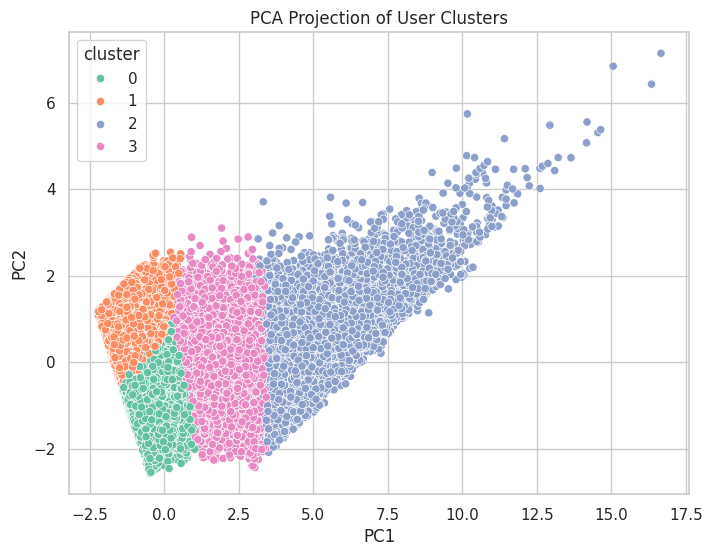

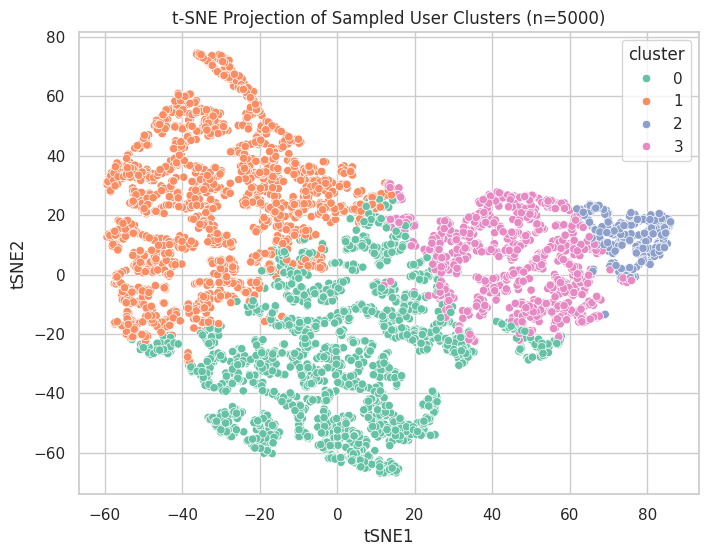

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# PCA Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title("PCA Projection of User Clusters")
plt.show()

# t-SNE Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', hue='cluster', palette='Set2')
plt.title("t-SNE Projection of Sampled User Clusters (n=5000)")
plt.show()


**Ακολουθεί το Transposrtation Problem Optimization**

Η Instacart θέλει να βελτιστοποιήσει τη μεταφορά προϊόντων από τις αποθήκες της προς διαφορετικές περιοχές με βάση τη ζήτηση των χρηστών. Ο στόχος είναι να καλύψουμε τη ζήτηση με το χαμηλότερο δυνατό κόστος.

**Suppliers** (Sources): Οι αποθήκες που παρέχουν προϊόντα (Warehouse A, B).

**Consumers** (Destinations): Περιοχές με ζήτηση (Region X, Y, Z).

**Supply**: Πόσα προϊόντα διαθέτει κάθε αποθήκη.

**Demand**: Πόσα προϊόντα χρειάζεται κάθε περιοχή.

**Max Capacity**: Πόσα προϊόντα μπορούν να σταλούν από κάθε αποθήκη σε κάθε περιοχή.

**Cost Matrix**: Το κόστος μεταφοράς ενός προϊόντος από κάθε αποθήκη σε κάθε περιοχή.

In [ ]:
import pandas as pd
from scipy.optimize import linprog


# Δεδομένα
# Προμήθεια (supply) από κάθε αποθήκη
supply = [100, 120]  # Αποθήκη 1, Αποθήκη 2

# Ζήτηση (demand) σε κάθε περιοχή
demand = [80, 70, 70]  # Περιοχή 1, 2, 3

# Κόστος μεταφοράς ανά μονάδα
costs = [
    [4, 6, 9],  # Από Αποθήκη 1
    [5, 4, 7],  # Από Αποθήκη 2
]

# Ανώτατη χωρητικότητα μεταφοράς από κάθε αποθήκη σε κάθε περιοχή
max_capacity = [
    [70, 30, 50],  # Από Αποθήκη 1
    [60, 50, 70],  # Από Αποθήκη 2
]

# Δημιουργία μοντέλου LP
num_sources = len(supply)
num_destinations = len(demand)
num_variables = num_sources * num_destinations

# Κόστος (1D vector)
c = [costs[i][j] for i in range(num_sources) for j in range(num_destinations)]

# Περιορισμοί ανισότητας (<=)
A_ub = []
b_ub = []

# Προσθήκη περιορισμών max capacity
for i in range(num_sources):
    for j in range(num_destinations):
        constraint = [0] * num_variables
        constraint[i * num_destinations + j] = 1
        A_ub.append(constraint)
        b_ub.append(max_capacity[i][j])

# Περιορισμοί ζήτησης (equality: sum of sources to each destination = demand)
A_eq = []
b_eq = []

# Για κάθε περιοχή
for j in range(num_destinations):
    constraint = [0] * num_variables
    for i in range(num_sources):
        constraint[i * num_destinations + j] = 1
    A_eq.append(constraint)
    b_eq.append(demand[j])

# Περιορισμοί προσφοράς (equality: sum of destinations from each source = supply)
for i in range(num_sources):
    constraint = [0] * num_variables
    for j in range(num_destinations):
        constraint[i * num_destinations + j] = 1
    A_eq.append(constraint)
    b_eq.append(supply[i])

# Όρια μεταβλητών (>= 0)
bounds = [(0, None)] * num_variables

# Λύση προβλήματος
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')


# Εμφάνιση αποτελεσμάτων
if result.success:
    x = result.x.reshape((num_sources, num_destinations))
    optimal_plan = pd.DataFrame(x, columns=[f"Περιοχή{i+1}" for i in range(num_destinations)],
                                   index=[f"Αποθήκη{i+1}" for i in range(num_sources)])
    total_cost = result.fun
else:
    optimal_plan = None
    total_cost = None

total_cost, optimal_plan

(1160.0,
           Περιοχή1  Περιοχή2  Περιοχή3
 Αποθήκη1      70.0      30.0      -0.0
 Αποθήκη2      10.0      40.0      70.0)

Κάνουμε ένα visualization του προβλήματος και της λύσης:

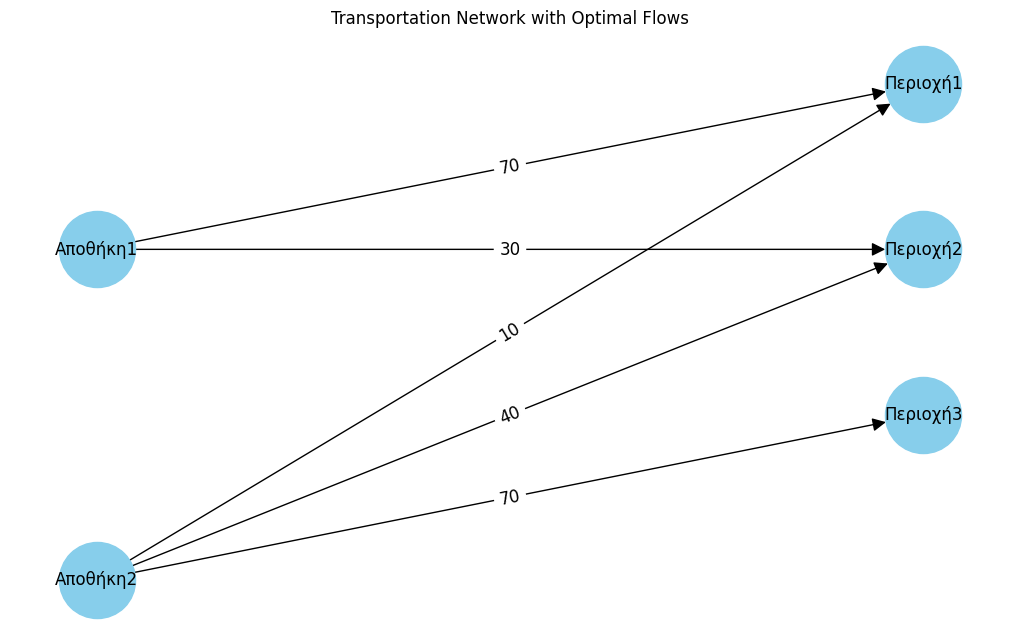

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Δημιουργία directed graph
G = nx.DiGraph()

# Κόμβοι αποθηκών και περιοχών
warehouses = ['Αποθήκη1', 'Αποθήκη2']
regions = ['Περιοχή1', 'Περιοχή2', 'Περιοχή3']

# Θέσεις για κόμβους
pos = {
    'Αποθήκη1': (-1, 0),
    'Αποθήκη2': (-1, -1),
    'Περιοχή1': (1, 0.5),
    'Περιοχή2': (1, 0),
    'Περιοχή3': (1, -0.5)
}

# Flows (από το βέλτιστο αποτέλεσμα)
flows = {
    ('Αποθήκη1', 'Περιοχή1'): 70,
    ('Αποθήκη1', 'Περιοχή2'): 30,
    ('Αποθήκη1', 'Περιοχή3'): 0,
    ('Αποθήκη2', 'Περιοχή1'): 10,
    ('Αποθήκη2', 'Περιοχή2'): 40,
    ('Αποθήκη2', 'Περιοχή3'): 70
}

# Προσθήκη ακμών με βάρη
for (w, r), flow in flows.items():
    if flow > 0:
        G.add_edge(w, r, weight=flow)

# Σχεδίαση
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', arrows=True, arrowstyle='-|>', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d}" for u, v, d in G.edges(data='weight')}, font_size=12)
plt.title("Transportation Network with Optimal Flows")
plt.axis('off')
plt.show()
